# Day 3 - Task 2: Word Embeddings

Author: Ayush Singh

Objective:
- Load pretrained GloVe model
- Find similar words
- Perform analogy tasks
- Visualize words using PCA
- Interactive word explorer
- Bonus: Compare GloVe and Word2Vec

In [1]:
import ssl
import certifi

# Correct SSL Fix
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

print("SSL Fix Applied Successfully")


SSL Fix Applied Successfully


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

print("Libraries loaded successfully")


Libraries loaded successfully


In [3]:
print("Loading GloVe model...")

glove_model = api.load("glove-wiki-gigaword-100")

print("GloVe model loaded successfully")

print("Vocabulary size:", len(glove_model))


Loading GloVe model...
[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe model loaded successfully
Vocabulary size: 400000


In [4]:
word = "king"

print("Similar words to:", word)

similar_words = glove_model.most_similar(word, topn=5)

for w, score in similar_words:
    print(w, ":", round(score,3))


Similar words to: king
prince : 0.768
queen : 0.751
son : 0.702
brother : 0.699
monarch : 0.698


In [5]:
print("Analogy: king - man + woman")

result = glove_model.most_similar(
    positive=["king","woman"],
    negative=["man"],
    topn=5
)

for word, score in result:
    print(word, ":", round(score,3))


Analogy: king - man + woman
queen : 0.77
monarch : 0.684
throne : 0.676
daughter : 0.659
princess : 0.652


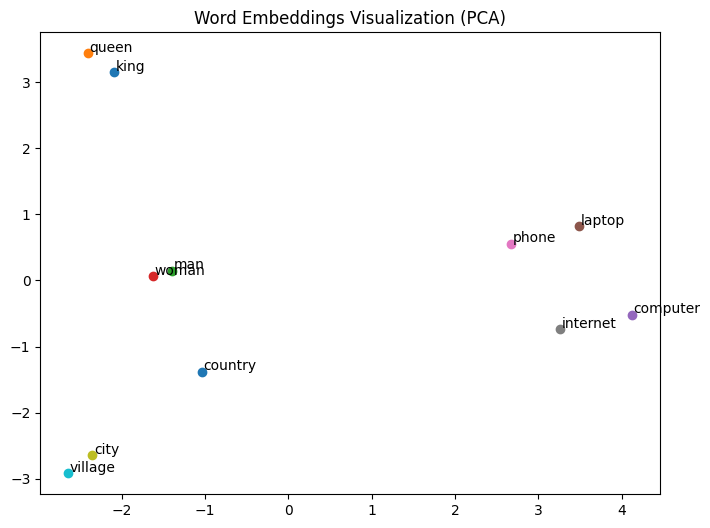

In [6]:
words = [
    "king","queen","man","woman",
    "computer","laptop","phone","internet",
    "city","village","country"
]

vectors = [glove_model[word] for word in words]

pca = PCA(n_components=2)

result = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))

for i, word in enumerate(words):

    x = result[i][0]
    y = result[i][1]

    plt.scatter(x,y)
    plt.text(x+0.02,y+0.02,word)

plt.title("Word Embeddings Visualization (PCA)")
plt.show()


In [7]:
def find_similar():

    word = input("Enter a word: ")

    if word in glove_model:

        print("\nSimilar words:\n")

        similar = glove_model.most_similar(word, topn=5)

        for w, score in similar:
            print(w, ":", round(score,3))

    else:
        print("Word not found in vocabulary")


find_similar()



Similar words:

computers : 0.875
software : 0.837
technology : 0.764
pc : 0.737
hardware : 0.729


In [8]:
def analogy():

    w1 = input("Enter word 1: ")
    w2 = input("Enter word 2: ")
    w3 = input("Enter word 3: ")

    result = glove_model.most_similar(
        positive=[w1,w3],
        negative=[w2],
        topn=3
    )

    print("\nResult:\n")

    for word, score in result:
        print(word, ":", round(score,3))


analogy()



Result:

queen : 0.581
crown : 0.519
monarch : 0.517


In [9]:
print("Loading Word2Vec model...")

word2vec_model = api.load("word2vec-google-news-300")

print("Word2Vec model loaded successfully")

print("Vocabulary size:", len(word2vec_model))


Loading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model loaded successfully
Vocabulary size: 3000000


In [10]:
word = "king"

print("GloVe Similar Words:\n")

for w, score in glove_model.most_similar(word, topn=5):
    print(w, ":", round(score,3))


print("\nWord2Vec Similar Words:\n")

for w, score in word2vec_model.most_similar(word, topn=5):
    print(w, ":", round(score,3))


GloVe Similar Words:

prince : 0.768
queen : 0.751
son : 0.702
brother : 0.699
monarch : 0.698

Word2Vec Similar Words:

kings : 0.714
queen : 0.651
monarch : 0.641
crown_prince : 0.62
prince : 0.616


In [11]:
print("Analogy Task: king - man + woman\n")

print("GloVe Result:")

for word, score in glove_model.most_similar(
    positive=["king","woman"],
    negative=["man"],
    topn=5):

    print(word, ":", round(score,3))


print("\nWord2Vec Result:")

for word, score in word2vec_model.most_similar(
    positive=["king","woman"],
    negative=["man"],
    topn=5):

    print(word, ":", round(score,3))


Analogy Task: king - man + woman

GloVe Result:
queen : 0.77
monarch : 0.684
throne : 0.676
daughter : 0.659
princess : 0.652

Word2Vec Result:
queen : 0.712
monarch : 0.619
princess : 0.59
crown_prince : 0.55
prince : 0.538


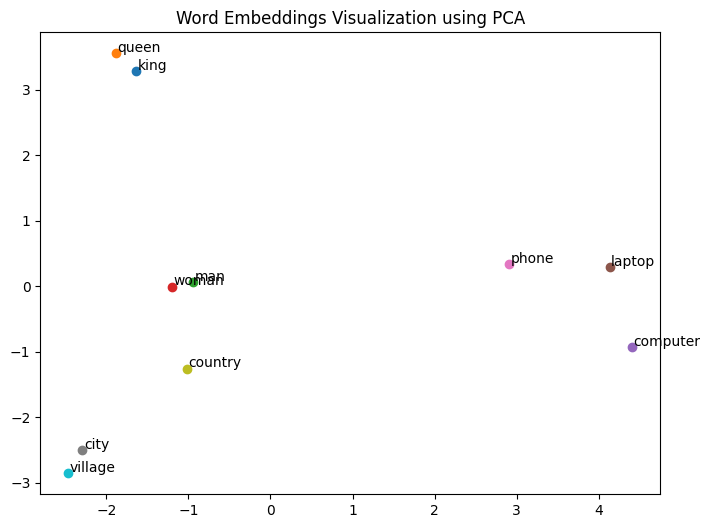

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = [
    "king","queen","man","woman",
    "computer","laptop","phone",
    "city","country","village"
]

vectors = [glove_model[word] for word in words]

pca = PCA(n_components=2)

result = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))

for i, word in enumerate(words):

    x = result[i][0]
    y = result[i][1]

    plt.scatter(x,y)
    plt.text(x+0.02,y+0.02,word)

plt.title("Word Embeddings Visualization using PCA")

plt.show()
